Files already downloaded and verified
Files already downloaded and verified


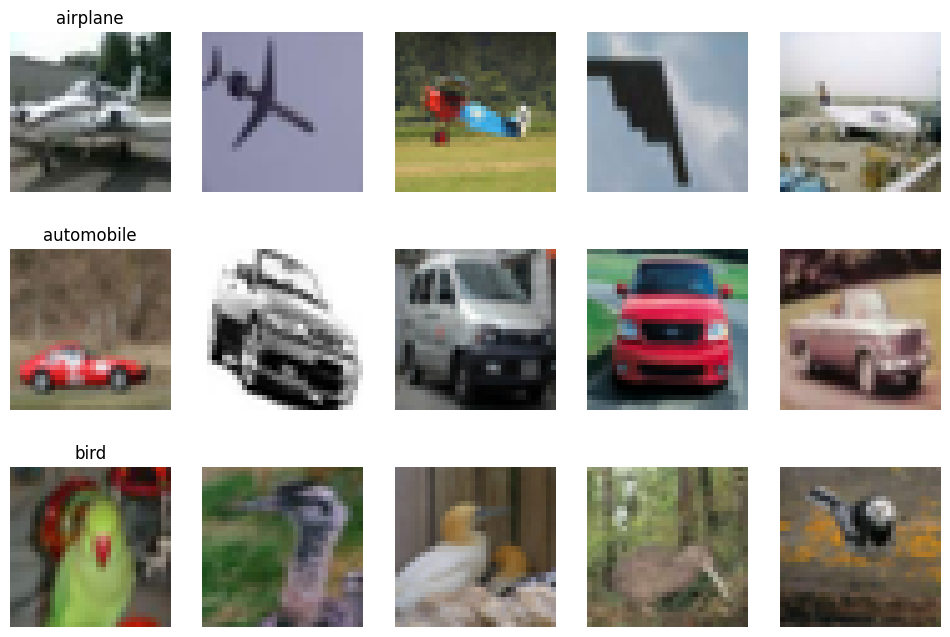

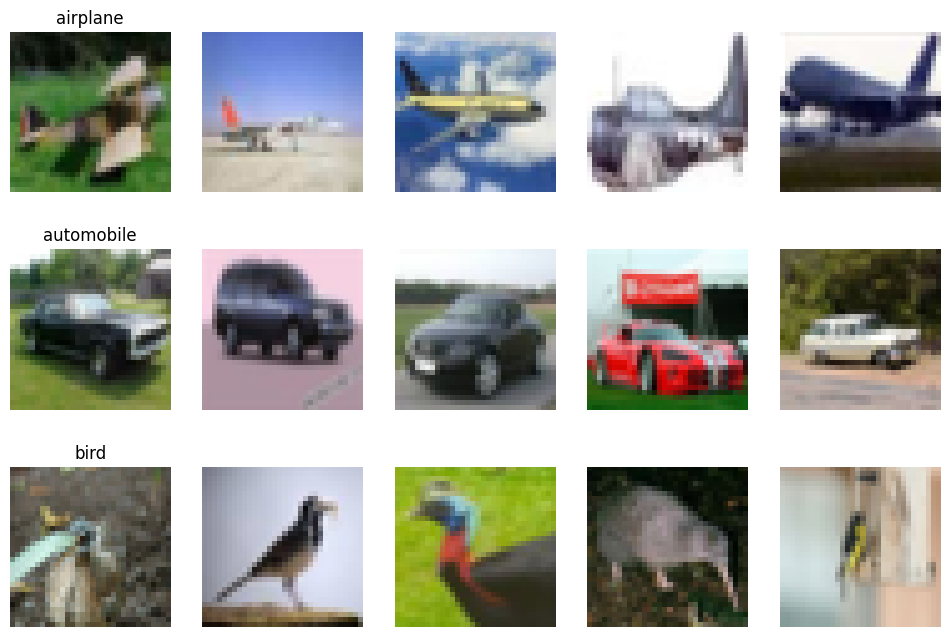

In [23]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset, random_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns
from torch import nn, optim

# 1. Define the classes to work with (e.g., 'airplane', 'automobile', 'bird')
class_indices = [0, 1, 2]  # CIFAR-10 classes: 0=airplane, 1=automobile, 2=bird

# 2. Define data transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# 3. Load CIFAR-10 dataset
full_train_data = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_data = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# 4. Filter for selected classes
def filter_classes(dataset, class_indices):
    filtered_indices = [i for i, (_, label) in enumerate(dataset) if label in class_indices]
    filtered_dataset = Subset(dataset, filtered_indices)
    return filtered_dataset

filtered_train_data = filter_classes(full_train_data, class_indices)
filtered_test_data = filter_classes(test_data, class_indices)

# 5. Separate train data into train (80%) and validation (20%) splits
train_size = int(0.8 * len(filtered_train_data))
val_size = len(filtered_train_data) - train_size

train_data, val_data = random_split(filtered_train_data, [train_size, val_size])

# 6. Create DataLoader for train, validation, and test datasets
batch_size = 64
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(filtered_test_data, batch_size=batch_size, shuffle=False)

# 2. Visualization: Visualize 5 images of each class from both the training and validation datasets
def visualize_images(dataset, num_images=5):
    class_names = ['airplane', 'automobile', 'bird']
    fig, axes = plt.subplots(len(class_names), num_images, figsize=(12, 8))
    for i, class_idx in enumerate(class_indices):
        images = [img[0] for img in dataset if img[1] == class_idx]
        for j in range(num_images):
            axes[i, j].imshow(images[j].permute(1, 2, 0) / 2 + 0.5)  # De-normalize image
            axes[i, j].axis('off')
            if j == 0:
                axes[i, j].set_title(class_names[i])
    plt.show()

# Visualize images from training dataset
visualize_images(train_data)

# Visualize images from validation dataset
visualize_images(val_data)

Epoch 1/15: Train Loss: 0.7344, Train Accuracy: 67.66% | Val Loss: 0.5643, Val Accuracy: 78.13%
Epoch 2/15: Train Loss: 0.5168, Train Accuracy: 79.62% | Val Loss: 0.4633, Val Accuracy: 81.37%
Epoch 3/15: Train Loss: 0.4581, Train Accuracy: 82.04% | Val Loss: 0.4613, Val Accuracy: 81.87%
Epoch 4/15: Train Loss: 0.4175, Train Accuracy: 83.71% | Val Loss: 0.3972, Val Accuracy: 84.37%
Epoch 5/15: Train Loss: 0.3817, Train Accuracy: 84.91% | Val Loss: 0.4417, Val Accuracy: 82.47%
Epoch 6/15: Train Loss: 0.3639, Train Accuracy: 86.05% | Val Loss: 0.3733, Val Accuracy: 85.40%
Epoch 7/15: Train Loss: 0.3429, Train Accuracy: 86.58% | Val Loss: 0.3676, Val Accuracy: 85.80%
Epoch 8/15: Train Loss: 0.3270, Train Accuracy: 87.40% | Val Loss: 0.3698, Val Accuracy: 85.83%
Epoch 9/15: Train Loss: 0.3132, Train Accuracy: 87.82% | Val Loss: 0.3477, Val Accuracy: 86.53%
Epoch 10/15: Train Loss: 0.2995, Train Accuracy: 88.18% | Val Loss: 0.4132, Val Accuracy: 84.13%
Epoch 11/15: Train Loss: 0.2864, Train 

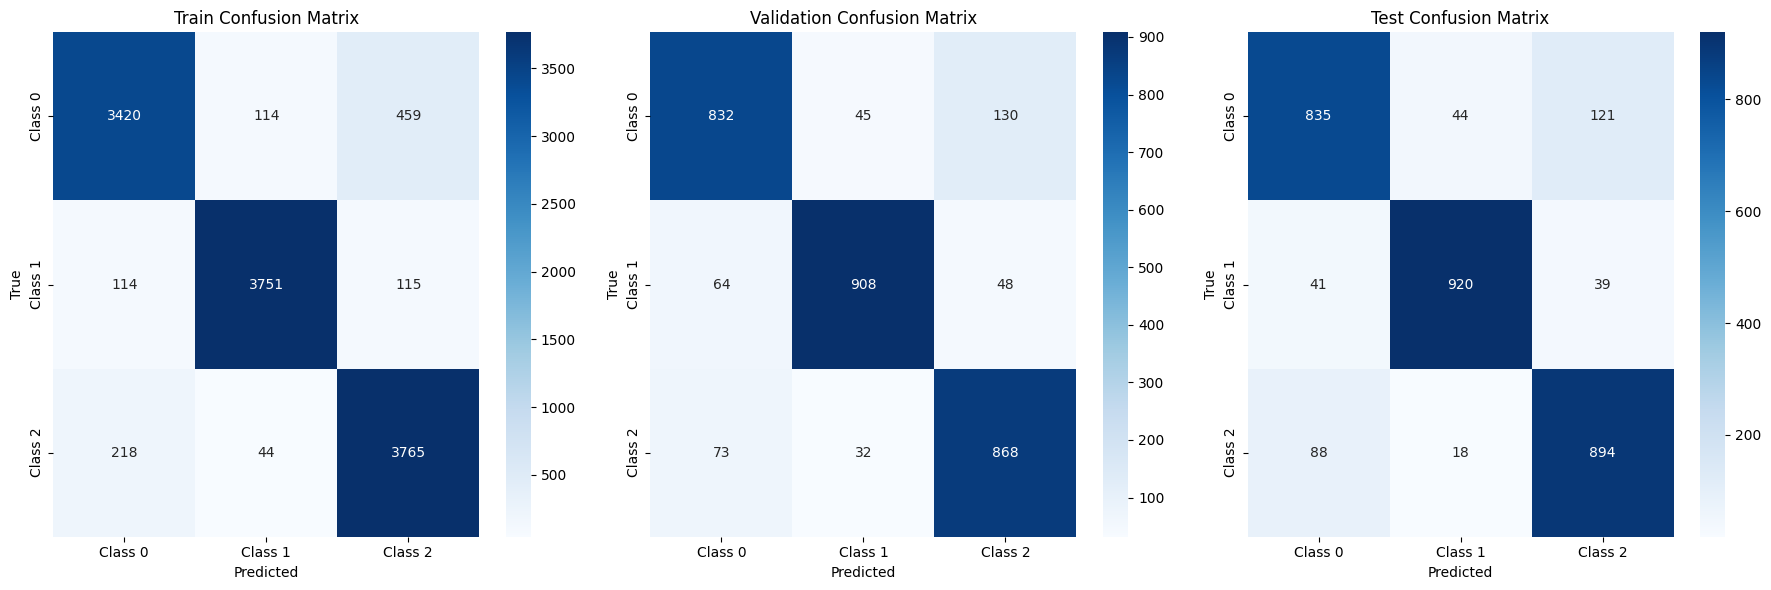

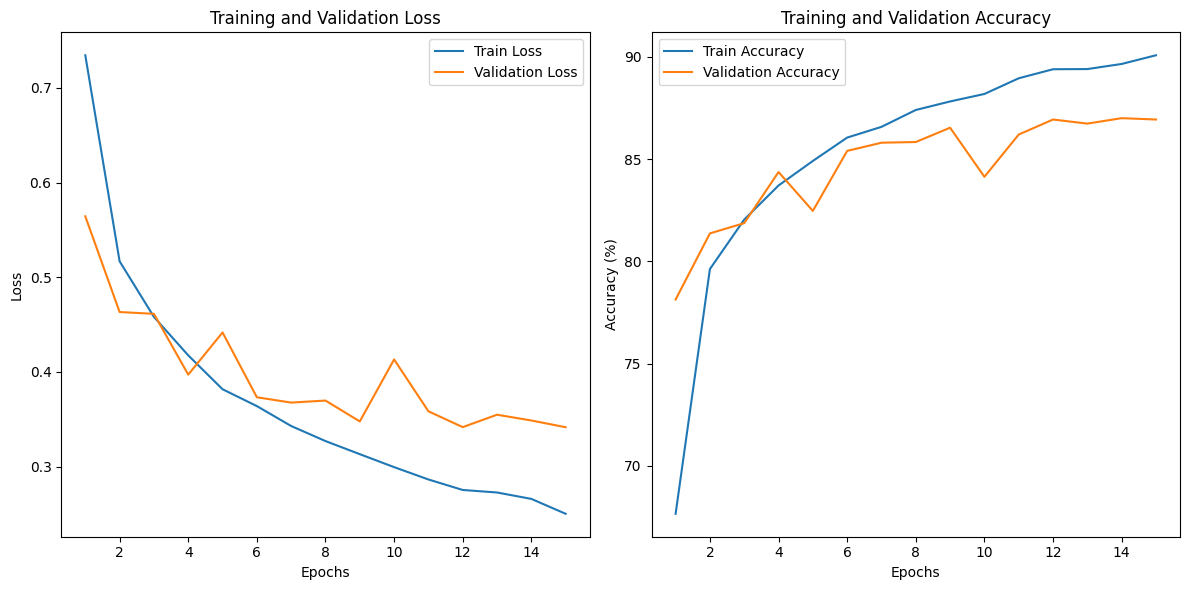

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# 3. CNN Model Implementation
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=5, padding=1, stride=1)
        self.pool1 = nn.MaxPool2d(kernel_size=3, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=0, stride=1)
        self.pool2 = nn.MaxPool2d(kernel_size=3, stride=3)
        self.fc1 = nn.Linear(32 * 4 * 4, 16)  
        self.fc2 = nn.Linear(16, 3)  

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.pool1(x)
        x = torch.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.view(-1, 32 * 4 * 4)  # Flatten
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 4. Training the Model
def train_model(model, train_loader, val_loader, num_epochs=15, learning_rate=0.001):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    train_loss_history = []
    val_loss_history = []
    train_acc_history = []
    val_acc_history = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_loss = running_loss / len(train_loader)
        train_acc = 100 * correct / total

        # Validation step
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        val_loss = val_loss / len(val_loader)
        val_acc = 100 * correct / total

        # Log results
        train_loss_history.append(train_loss)
        val_loss_history.append(val_loss)
        train_acc_history.append(train_acc)
        val_acc_history.append(val_acc)

        print(f"Epoch {epoch+1}/{num_epochs}: "
              f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f}% | "
              f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_acc:.2f}%")

    # Define the model and save directory
    model_dir = 'model'

    # Ensure the 'model' directory exists
    if not os.path.exists(model_dir):
        os.makedirs(model_dir)

    # Assuming `cnn_model` is the model you want to save
    torch.save(cnn_model.state_dict(), os.path.join(model_dir, "cnn_model.pth"))

    print("Model saved to:", os.path.join(model_dir, "cnn_model.pth"))
    return model, train_loss_history, val_loss_history, train_acc_history, val_acc_history

# 5. Testing the Model and Reporting Metrics
def evaluate_model(model, data_loader):
    model.eval()
    y_true = []
    y_pred = []
    
    with torch.no_grad():
        for inputs, labels in data_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            y_true.extend(labels.numpy())
            y_pred.extend(predicted.numpy())
    
    # Return true and predicted labels for confusion matrix
    return y_true, y_pred

# 6. Plotting Confusion Matrix for Train, Validation, and Test Data
def plot_confusion_matrices(model, train_loader, val_loader, test_loader):
    # Get predictions for train, val, and test datasets
    y_train_true, y_train_pred = evaluate_model(model, train_loader)
    y_val_true, y_val_pred = evaluate_model(model, val_loader)
    y_test_true, y_test_pred = evaluate_model(model, test_loader)

    # Compute confusion matrices
    cm_train = confusion_matrix(y_train_true, y_train_pred)
    cm_val = confusion_matrix(y_val_true, y_val_pred)
    cm_test = confusion_matrix(y_test_true, y_test_pred)

    # Plot confusion matrices
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    # Train Confusion Matrix
    sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'], ax=axs[0])
    axs[0].set_title('Train Confusion Matrix')
    axs[0].set_xlabel('Predicted')
    axs[0].set_ylabel('True')

    # Validation Confusion Matrix
    sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'], ax=axs[1])
    axs[1].set_title('Validation Confusion Matrix')
    axs[1].set_xlabel('Predicted')
    axs[1].set_ylabel('True')

    # Test Confusion Matrix
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'], ax=axs[2])
    axs[2].set_title('Test Confusion Matrix')
    axs[2].set_xlabel('Predicted')
    axs[2].set_ylabel('True')

    plt.tight_layout()
    plt.show()

# 7. Plotting Loss and Accuracy
def plot_loss_accuracy(train_loss, val_loss, train_acc, val_acc):
    epochs = range(1, len(train_loss) + 1)
    
    # Plot Loss
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, label='Train Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_acc, label='Train Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Initialize the model
cnn_model = CNNModel()

# Train the model
cnn_model, train_loss, val_loss, train_acc, val_acc = train_model(cnn_model, train_loader, val_loader)

# 8. Plot Confusion Matrices for Train, Validation, and Test Data
plot_confusion_matrices(cnn_model, train_loader, val_loader, test_loader)

# 9. Plot Training and Validation Loss and Accuracy
plot_loss_accuracy(train_loss, val_loss, train_acc, val_acc)


Epoch 1/15: Train Loss: 0.6868, Train Accuracy: 72.10% | Val Loss: 0.6446, Val Accuracy: 74.83%
Epoch 2/15: Train Loss: 0.5729, Train Accuracy: 77.37% | Val Loss: 0.5826, Val Accuracy: 77.93%
Epoch 3/15: Train Loss: 0.5094, Train Accuracy: 80.24% | Val Loss: 0.5701, Val Accuracy: 78.43%
Epoch 4/15: Train Loss: 0.4681, Train Accuracy: 82.15% | Val Loss: 0.5591, Val Accuracy: 78.67%
Epoch 5/15: Train Loss: 0.4375, Train Accuracy: 83.33% | Val Loss: 0.5653, Val Accuracy: 77.90%
Epoch 6/15: Train Loss: 0.3960, Train Accuracy: 84.86% | Val Loss: 0.5512, Val Accuracy: 80.00%
Epoch 7/15: Train Loss: 0.3845, Train Accuracy: 85.56% | Val Loss: 0.5691, Val Accuracy: 79.03%
Epoch 8/15: Train Loss: 0.3494, Train Accuracy: 87.12% | Val Loss: 0.5435, Val Accuracy: 80.40%
Epoch 9/15: Train Loss: 0.3227, Train Accuracy: 88.11% | Val Loss: 0.5544, Val Accuracy: 80.00%
Epoch 10/15: Train Loss: 0.3099, Train Accuracy: 88.58% | Val Loss: 0.5859, Val Accuracy: 80.60%
Epoch 11/15: Train Loss: 0.2895, Train 

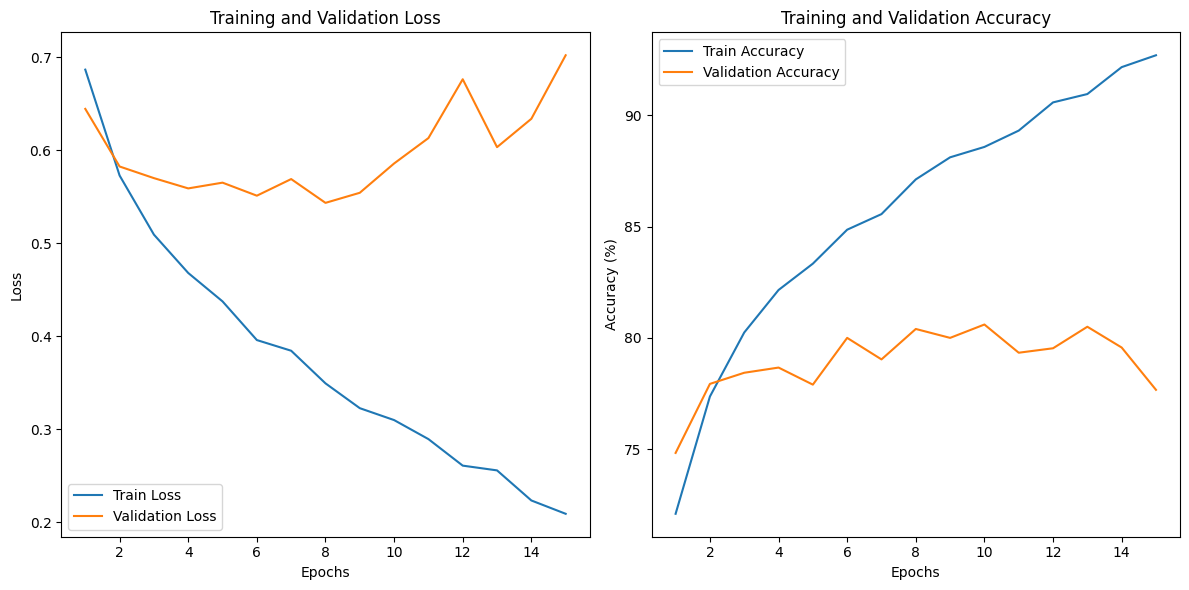

In [25]:
from sklearn.metrics import f1_score, accuracy_score

# 5. Testing the Model and Reporting Metrics
def evaluate_model(model, data_loader):
    model.eval()
    y_true = []
    y_pred = []
    
    with torch.no_grad():
        for inputs, labels in data_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            y_true.extend(labels.numpy())
            y_pred.extend(predicted.numpy())
    
    # Calculate accuracy and F1 score
    accuracy = accuracy_score(y_true, y_pred) * 100
    f1 = f1_score(y_true, y_pred, average='weighted')
    
    # Return accuracy and F1 score
    return accuracy, f1

# 
# test_accuracy_mlp, test_f1_mlp = evaluate_model(mlp_model, test_loader)

# Print the results
# print(f"Test Accuracy (MLP): {test_accuracy_mlp:.2f}%")
# print(f"Test F1-Score (MLP): {test_f1_mlp:.4f}")


# 6. Training an MLP Model
class MLPModel(nn.Module):
    def __init__(self):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(3 * 32 * 32, 64)  # Flatten input size 3x32x32
        self.fc2 = nn.Linear(64, 3)  # 3 output classes

    def forward(self, x):
        x = x.view(-1, 3 * 32 * 32)  # Flatten
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Train MLP model
mlp_model = MLPModel()

# Train the model
mlp_model, train_loss, val_loss, train_acc, val_acc = train_model(mlp_model, train_loader, val_loader)

# Evaluate MLP model on the test dataset
test_accuracy_mlp, test_f1_mlp = evaluate_model(mlp_model, test_loader)
print(f"Test Accuracy (MLP): {test_accuracy_mlp:.2f}%")
print(f"Test F1-Score (MLP): {test_f1_mlp:.4f}")

# 7. Compare the performance of CNN and MLP
print(f"Performance Comparison:")
# print(f"CNN Test Accuracy: {test_accuracy:.2f}%, CNN Test F1-Score: {test_f1:.4f}")
print(f"MLP Test Accuracy: {test_accuracy_mlp:.2f}%, MLP Test F1-Score: {test_f1_mlp:.4f}")

# 8. Plot Training and Validation Loss and Accuracy
def plot_loss_accuracy(train_loss, val_loss, train_acc, val_acc):
    epochs = range(1, len(train_loss) + 1)
    
    # Plot Loss
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, label='Train Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_acc, label='Train Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot for CNN Model
plot_loss_accuracy(train_loss, val_loss, train_acc, val_acc)


Epoch 1/15: Train Loss: 0.6808, Train Accuracy: 72.26% | Val Loss: 0.6323, Val Accuracy: 75.33%
Epoch 2/15: Train Loss: 0.5794, Train Accuracy: 76.97% | Val Loss: 0.5948, Val Accuracy: 77.37%
Epoch 3/15: Train Loss: 0.5088, Train Accuracy: 79.84% | Val Loss: 0.5667, Val Accuracy: 78.47%
Epoch 4/15: Train Loss: 0.4669, Train Accuracy: 82.03% | Val Loss: 0.5675, Val Accuracy: 78.27%
Epoch 5/15: Train Loss: 0.4373, Train Accuracy: 83.16% | Val Loss: 0.5637, Val Accuracy: 78.97%
Epoch 6/15: Train Loss: 0.4101, Train Accuracy: 84.07% | Val Loss: 0.5462, Val Accuracy: 78.93%
Epoch 7/15: Train Loss: 0.3882, Train Accuracy: 85.33% | Val Loss: 0.6027, Val Accuracy: 78.13%
Epoch 8/15: Train Loss: 0.3551, Train Accuracy: 86.67% | Val Loss: 0.5596, Val Accuracy: 79.07%
Epoch 9/15: Train Loss: 0.3290, Train Accuracy: 87.78% | Val Loss: 0.5797, Val Accuracy: 79.43%
Epoch 10/15: Train Loss: 0.3008, Train Accuracy: 88.93% | Val Loss: 0.6066, Val Accuracy: 79.20%
Epoch 11/15: Train Loss: 0.2949, Train 

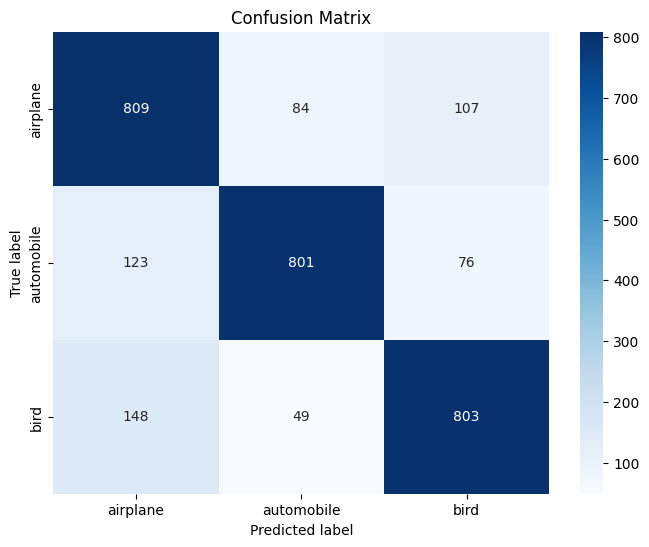

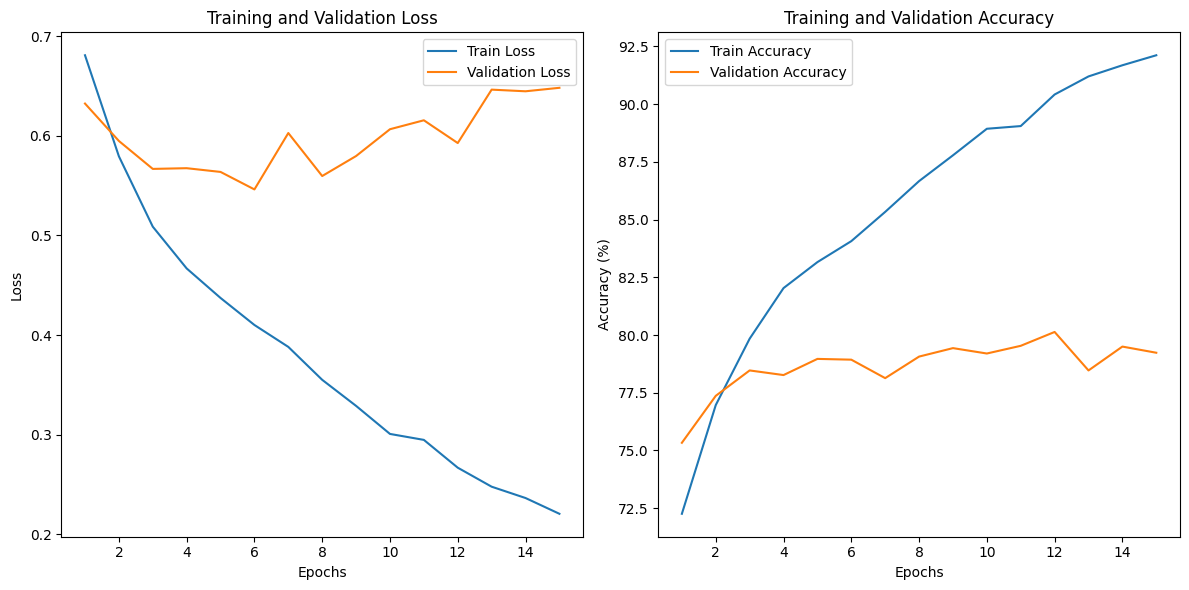

In [26]:
import torch
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Directory to save the model files
model_dir = 'model'
os.makedirs(model_dir, exist_ok=True)

# 6. Training an MLP Model
class MLPModel(nn.Module):
    def __init__(self):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(3 * 32 * 32, 64)  # Flatten input size 3x32x32
        self.fc2 = nn.Linear(64, 3)  # 3 output classes

    def forward(self, x):
        x = x.view(-1, 3 * 32 * 32)  # Flatten
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Train MLP model
mlp_model = MLPModel()

# Train the model
mlp_model, train_loss, val_loss, train_acc, val_acc = train_model(mlp_model, train_loader, val_loader)

# Save the MLP model
torch.save(mlp_model.state_dict(), os.path.join(model_dir, 'mlp_model.pth'))

# Evaluate MLP model on the test dataset
test_accuracy_mlp, test_f1_mlp = evaluate_model(mlp_model, test_loader)
print(f"Test Accuracy (MLP): {test_accuracy_mlp:.2f}%")
print(f"Test F1-Score (MLP): {test_f1_mlp:.4f}")

print(f"Performance Comparison:")
# print(f"CNN Test Accuracy: {test_accuracy:.2f}%, CNN Test F1-Score: {test_f1:.4f}")
print(f"MLP Test Accuracy: {test_accuracy_mlp:.2f}%, MLP Test F1-Score: {test_f1_mlp:.4f}")

# Confusion Matrix
def plot_confusion_matrix(model, test_loader, class_names=['airplane', 'automobile', 'bird']):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Compute confusion matrix
    cm = confusion_matrix(all_labels, all_preds)

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix')
    plt.show()

# Plot confusion matrix for MLP model
plot_confusion_matrix(mlp_model, test_loader)

# 8. Plot Training and Validation Loss and Accuracy
def plot_loss_accuracy(train_loss, val_loss, train_acc, val_acc):
    epochs = range(1, len(train_loss) + 1)
    
    # Plot Loss
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, label='Train Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_acc, label='Train Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot for MLP Model
plot_loss_accuracy(train_loss, val_loss, train_acc, val_acc)




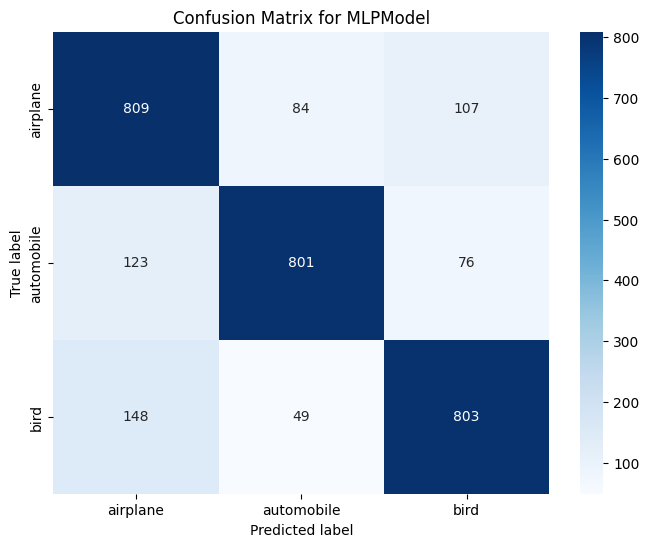

MLP Test Accuracy: 80.43%
MLP Test F1-Score: 0.8050


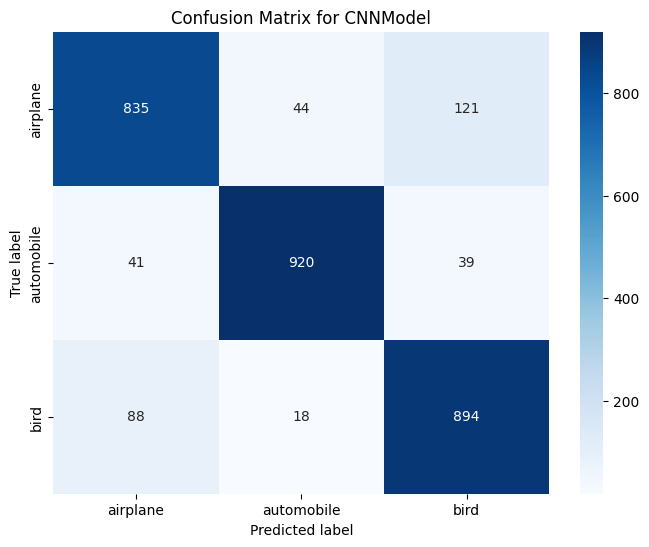

CNN Test Accuracy: 88.30%
CNN Test F1-Score: 0.8831


In [29]:
import torch
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from torch.utils.data import DataLoader

# Assuming MLPModel and CNNModel are already defined
# Define the directory where your models are saved
model_dir = 'model'
# Load MLP Model
mlp_model = MLPModel()
mlp_model.load_state_dict(torch.load(os.path.join(model_dir, 'mlp_model.pth')))
mlp_model.eval()
# Load CNN Model
cnn_model = CNNModel()
cnn_model.load_state_dict(torch.load(os.path.join(model_dir, 'cnn_model.pth')))
cnn_model.eval()
# Define function to evaluate the model on test data
def evaluate_model(model, test_loader, class_names=['airplane', 'automobile', 'bird']):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Compute accuracy and F1-score
    accuracy = accuracy_score(all_labels, all_preds) * 100
    f1 = f1_score(all_labels, all_preds, average='weighted')

    # Compute confusion matrix
    cm = confusion_matrix(all_labels, all_preds)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title(f'Confusion Matrix for {model.__class__.__name__}')
    plt.show()

    return accuracy, f1, cm

# Evaluate MLP model
test_accuracy_mlp, test_f1_mlp, cm_mlp = evaluate_model(mlp_model, test_loader)
print(f"MLP Test Accuracy: {test_accuracy_mlp:.2f}%")
print(f"MLP Test F1-Score: {test_f1_mlp:.4f}")

# Evaluate CNN model
test_accuracy_cnn, test_f1_cnn, cm_cnn = evaluate_model(cnn_model, test_loader)
print(f"CNN Test Accuracy: {test_accuracy_cnn:.2f}%")
print(f"CNN Test F1-Score: {test_f1_cnn:.4f}")